In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 0)
import matplotlib.pyplot as plt
import utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, linear_kernel
from scipy import interpolate
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.base import clone

import seaborn as sns
import utils
import warnings
warnings.filterwarnings('ignore')

from PIL import Image, ImageFont
from wordcloud import WordCloud

start = "\033[1m"
end = "\033[0;0m"

In [4]:
df = utils.get_data()

![](https://i.postimg.cc/CdTBtRHt/1.png)

# Executive Summary


*“What is the secret of binge-watching?* and *“what to watch next?”* are related questions thay may have a single answer: a movie recommender system. A simple movie recommender offers generalized recommendations to users based on movie popularity and/or genre. This method does not provide personalized recommendations based on the user’s profile and history.[[1]](https://www.kaggle.com/rounakbanik/movie-recommender-systems) 

This project aims to provide a glimpse into the computer program that powers and contributes to the success of streaming giants like Netflix. Instead of popularity, movie synopses and genre were employed in this model, and the goal is to generate meaningful recommendations to users for movies that may interest them. The researchers believe that developing a simple cosine similarity-based movie recommender system may give local media companies and aspiring streaming service providers a headstart. It can also benefit the consumers by improving decision-making process and quality, thereby eliminating the question *“what to watch next?”*.

The recommender system was created using an IMDb scraped dataset, with the features 1) `about` and 2) `genre` as the main focus. The raw data were cleaned and preprocessed before converting the relevant features into a Term Frequency and Inverse Document Frequency (TF-IDF) matrix. This sparse matrix representation of token counts served as a basis for the two key techniques implemented in this project: 1) model creation using cosine similarity and 2) cluster analysis using k-means. The latter required dimensionality reduction, therefore  Latent Semantic Analysis was performed to the TF-IDF matrix. The output clusters of similar movies were primarily used as pseudo-ground truth labels in evaluating the performance of the movie recommender system.

The following are the key findings from calculating the model performance:

1. The most effective feature combination was the movie synopses paired with genres, which generated the highest precision score. 
2. The seven output clusters produced by the k-means clustering algorithm that served as pseudo-ground truth labels were successful in evaluating the model's performance, when combined with the results of the model.
3. The recommender system outperforms random prediction by a factor of two. The former had an average precision score of 37.16%, whereas the latter had only 17.20%.

This movie recommender system is simple, but its performance can be further enhanced. Improvements can be achieved by: 1) acquiring and utilizing larger dataset, as the model only used roughly 1,400 data points; 2) adding user demographic data as features, and; 3) including TV series data as episodic programming is also thought to be the key driver of binge-watching.[[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7344932/)

The researchers recognize the value that binge-watching provides people during this challenging period brought about by COVID-19, but do not in anyway advocate for it. It is recommended to deep dive into the negative attributes of binge-watching to unravel the multiple issues surrounding it, as well as highlighting the distinction between compulsive and recreational binge-watching.

# I. Introduction


#### Binge-watching

Binge-watching is the practice of viewing multiple movies or television series in a single sitting. This viewing pattern has grown in popularity as a leisure or recreational activity since 2013.[[3]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7344932/) With the global imposition of isolation, quarantine, shutdown, and lockdown procedures as a result of the COVID-19 epidemic, binge-watching has become one of the most accessible, and often affordable, forms of entertainment for people restricted at home. The streaming industry, on the other hand, is investing more in creating web series and movies that entice people to binge-watch, and to encourage this habit, all of the series and movies are frequently launched at the same time.[[4]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7219409/#bib0002)

**Streaming Revolution**

In a world where COVID-19 is still wreaking havoc, binge-watching provides individuals with comfort and solace, and competition among streaming providers is intensifying.[[5]](https://www.emerald.com/insight/content/doi/10.1108/SAJM-05-2021-0070/full/html)

Netflix revolutionized the way people consume entertainment by producing high-quality content that millions of people could watch. It created history by ushering in the streaming era and igniting a war against media platforms and companies in global distribution and video service investment.[[6]](https://sea.ign.com/feature/176013/what-is-the-future-of-the-streaming-wars-state-of-streaming-30) The war over movies and series streaming has intensified in the midst of the COVID-19 pandemic. Based on popularity and number of subscriptions, the platforms that have won thus far this year, 2021, are the following:[[7]](https://www.usnews.com/360-reviews/streaming-services)

- ***Netflix*** -- Best Streaming Service 
- ***Amazon Prime Video*** -- Best Value Streaming Service
- ***Disney+*** -- Best Streaming Service for Families
- ***HBO Max*** -- Best Streaming Home Box
- ***Hulu*** -- Best Streaming Service for Cord-cutters

# II. Motivation

Netflix has been dominating the rankings for the past decade. Its main competitors are Amazon Prime Video and Disney+, both of which are rapidly growing year after year. In recent years, many companies have attempted to enter the competitive industry by launching streaming services.[[8]](https://www.businessofapps.com/data/video-streaming-app-market/) Funimation, Peacock, Crunchyroll, Paramount+, and Apple TV+ are some of the other streaming platforms that are gaining traction around the world.[[9]](https://www.usnews.com/360-reviews/streaming-services)

**iWantTFC**

iWantTFC, formerly known as iWantTV, is a merged service of iWant and TFC Online. It is the sole over-the-top entertainment platform produced and operated in the Philippines, and it is owned by ABS-CBN, a local media conglomerate that was closed down by the government in 2020 and is now creating movies and series for online consumption.[[10]](https://www.nytimes.com/2020/07/10/world/asia/philippines-congress-media-duterte-abs-cbn.html)

Over 10,000 hours of content and programs, as well as over 1,000 films, are stored on iWantTFC. Aside from foreign content, iWantTFC's catalog contains films produced by ABS-CBN Entertainment and ABS-CBN Films. iWantTFC has produced over 20 original films and over 50 original series known as iWant Originals since its inception. Its value proposition is to deliver content for Filipinos to enjoy whenever they want, and on any device.[[11]](https://en.wikipedia.org/wiki/IWantTFC#Content)

**The Cost of Entertainment**

iWantTFC offers a free plan and 30-day free trial for users in the Philippines, but with limited offerings. Upgrading to a  premium plan with the enhanced viewing experience, wider selections, ad-free, and offline viewing costs ₱15 daily or ₱60 weekly or ₱120 monthly. Whereas, Netflix’s cheapest plan is ₱149 monthly,19% higher than that of iWantTFC.

For users in the Philippines, iWantTFC provides a free plan and a 30-day free trial, albeit with limited offerings. Upgrading to a premium plan with enhanced viewing experience, extensive selections, ad-free, and offline viewing costs ₱15 per day, ₱60 weekly, or ₱120 monthly.[[12]](https://www.manilatimes.net/2020/11/24/lifestyle-entertainment/show-times/abs-cbn-launches-new-iwanttfc-streaming-service/800629)
Netflix's basic plan is ₱149 monthly,[[13]](https://www.netflix.com/ph/#:~:text=How%20much%20does%20Netflix%20cost,No%20extra%20costs%2C%20no%20contracts.) which is 19% more expensive than iWantTFC’s. 


# III. Problem Statement

This project aims to provide a glimpse into the computer program that runs and contributes significantly to the success of streaming leaders such as Netflix -- a recommender system. The researchers believe that developing a simple movie recommender system would provide local media companies and aspiring streaming service providers a headstart.

A cosine similarity-based movie recommender system can benefit both streaming service providers and consumers by improving the decision-making process and quality.[[14]](https://www.sciencedirect.com/science/article/pii/S1110866515000341) By not dwelling on the question of "*what to watch next*," viewers would be able to just enjoy and save some of their most valuable resource: time.

# IV. Data Source 

The [IMDb](https://www.imdb.com/) website is the primary data source for this project. BeautifulSoup (bs4) was utilized to scrape the data.

IMDb or Internet Movie Database is an Amazon subsidiary that has been in operation for nearly three decades. It is an open online repository of movies and television series with over eight million titles and 83 million registered users from all over the world. The database also includes cast, production crew, and personal biographies, filmographies, plot summaries, trivia, ratings, and fan and critics’ reviews.[[15]](https://en.wikipedia.org/wiki/IMDb)

### IV.A. Data Dictionary

The dataset has 11 columns, each with the following descriptions:

<Center><b>Table 1: </b>  Data Dictionary</Center>

| Features          | Description                                                              |
|-------------------|--------------------------------------------------------------------------|
| id                | ID given to the movie for count purposes                               |
| name              | title of the movie                                                      |
| year              | year when the movies was released                                       |
| run_time_mins     | running time of the movie in minutes                                    |
| genre             | genre of the movie                                                      |
| rating            | rating of the movie from 1 to 10                                        |
| about             | movie synopsis.                                                          |
| director          | director(s) of the movie                                                |
| actors            | actor(s) who were shown in the movie                                    |
| votes             | total number of votes given by users for the movie                      |
| gross_millions    | gross amount earned by the movie on opening release                     |



### IV.B. Raw Data Cleaning

The dataset was cleaned from scraped data in order to be ready for exploratory data analysis and model-building for the recommender system.

**Dropping of null values**. The dataset had around 1400 rows, however the researchers had to remove rows with null values and were thus unusable.

**Imputing values**. The *gross_million* feature contained a significant number of null values, however the researchers decided to impute the values using `medians` in order to use the feature properly. The median was employed to prevent the values from being biased by high-grossing or low-performing films.

**Dropoing of duplicates**  To prevent repeating points from skewing the data, all duplicates were removed.

**Dropping trivial columns**. Columns that were irrelevant or unusable were removed.

# V. Methodology

[1] **Data Collection and Storage** Web scraping techniques were utilized to collect data from the IMDB website, which yielded approximately 1400 data points. BeautifulSoup (bs4) was the primary tool used. The web scraping script used proxy IP addresses to avoid getting banned for performing web scraping techniques.


[2] **Data Cleaning and Preprocessing**. The raw data was cleaned using standard text cleaning techniques such as removing accented characters and stop words from the document. The removal of null values was done in conjunction with other processes such as the removal of duplicates and trivial features.


[3] **Exploratory Data Analysis(EDA)**. This was done to the cleaned and preprocessed data in order to gain insights into the overall behavior of the dataset. The methods performed ranged from basic descriptive statistics to the creation of word clouds.


[4] **Dimensionality Reduction**. Two dimensionality reduction techniques were implemented to the TF-IDF matrix:  Nonnegative Matrix Factorization(NMF) for the recommender system, and Latent Semantic Analysis (LSA) for clustering. 


[5] **Model Creation**. A simple movie recommender system was built using `cosine similarity` distance metric.


[6] **Clustering**. $k$-means clustering was utilized in grouping similar movies that served as the pseudo-ground truth labels in calculating the model performance.

### V.A. Data Cleaning and Preprocessing

Before the model can understand and interpret human language, a lot of preprocessing occurs behind the scenes. The features to be analyzed are movie synopses and genres. To prepare the data for analysis and modeling, the following workflow is followed:


[1] **Basic cleaning techniques of non-text data.**
To prepare the data for EDA and model creation, the researchers performed standard data cleaning and data wrangling techniques such as converting string numerical columns into float or int, and eliminating unnecessary characters from numerical columns.


[2] **Converting accented characters.**
Accented characters are important elements that are utilized to signify emphasis on a certain word during pronunciation or comprehension. Some examples include résumé, café, prótest, divorcé, coördinate, exposé, and latté. In this project, however, all accented characters are transformed to their base form. Researchers used this method to ensure that characters that appear to be same are, in fact, identical. The text was converted and standardized into ASCII characters. Converting é to e in résumé is a simple example.


[3] **Removing punctuation, numbers and special characters.**
Non-alphanumeric characters are referred to as special characters. These characters provide no value to text comprehension and create noise in algorithms. To remove these characters and digits, the researchers employed regular expressions (regex).


[4] **Removing stop words.**
Filtering out useless data is a common type of data preprocessing. In natural language processing, stop words are deemed useless data. A stop word is a commonly used word (e.g., "the," "a," "an," or "in") that is usually overlooked in the analysis. To filter and eliminate the stop words, the researchers employed the NLTK stop words module.


[5] **Converting text to its base form or root form (Lemmatization).**
The texts are derived to their word stem, base, or root form using lemmatization. For example, the word "eating" is reduced to its simplest form, "eat."


[6] **Removing extra whitespaces and tabs.**
Extra whitespaces and tabs were also removed as they provide no information to text processing.


[7] **Converting to lowercase.**
The characters or text were also converted to lowercase by using the lower function.


### V.B. Dimensionality Reduction


Latent Semantic Analysis (LSA) through Singular Value Decomposition (SVD) was performed as a pre-clustering technique. It utilized the TF-IDF sparse matrix and reduced its dimensions by performing a matrix decomposition on the document-term matrix.  A document-term matrix is filled with weights corresponding to the importance of the term in the specific document (TF-IDF) and reduced to a lower dimensional space called the concept space.[[16]](https://www.sciencedirect.com/topics/computer-science/latent-semantic-analysis) LSA was performed as a pre-clustering technique.

Nonnegative Matrix Factorization (NMF) is a technique for obtaining low rank representation of matrices with non-negative or positive elements. Such matrices are common in a variety of applications of interest. For example, images are nothing but matrices of positive integer numbers representing pixel intensities. In information retrieval and text mining, we rely on term-document matrices for representing document collections. In recommendation systems, we have utility matrices showing customers’ preferences for items.[[17]](https://iksinc.online/2016/03/21/what-is-nmf-and-what-can-you-do-with-it/)
 
    
### V.C. Model Creation

The model that powers the recommender system employs a distance metric known as `cosine similarity`, wherein if two movies are represented as two vectors in a given space, the closer these two vectors are to each other, the higher the likelihood that the recommender system is to label these two movies (represented as vectors) are similar to each other.

\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation} [[18]](https://hal.inria.fr/file/index/docid/681906/filename/faq-assembly.tex)   
     
    
### V.D. Clustering

$k$-Means is one of the most popular clustering algorithms. $k$-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. $k$-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) choosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.[[19]](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

To identify the best number of $k$ and evaluate the quality of the clusters, the researchers visualized, eyeballed, and validated the clusters using internal validation measures such as Calinski-Harabasz Index (CH) and Silhouette Coefficient. Following the selection of the best $k$, the clusters were visualized using word clouds and analyze the genres they clusters may represent.


### V.E. Evaluating the Model Performance

The performance of the model is quantified using simple `precision` by comparing the prediction of a random model to the performance of the cosine similarity-based model, where the ground truth (or pseudo-ground truth) is based on $k$-means clustering prediction results.

# VI. Data Exploration

### VI.A. Data Types per Feature

<Center><b>Table 2: </b>  Data Information</Center>

|    |Column          | Count | Non-Null|Dtype  
|--- | ------         | ----- |--------- | -----  
| 0  | id             | 1060  | non-null  | int64  
| 1  | name           | 1060  | non-null  | object 
| 2  | year           | 1060  | non-null  | int64  
| 3  | run_time_mins  | 1060  | non-null  | int64  
| 4  | genre          | 1060  | non-null  | object 
| 5  | rating         | 1060  | non-null  | float64
| 6  | about          | 1060  | non-null  | object 
| 7  | director       | 1060  | non-null  | object 
| 8  | actors         | 1060  | non-null  | object 
| 9  | votes          | 1060  | non-null  | int64  
| 10 | gross_millions | 1060  | non-null  | float64

### VI.B. Descriptive Statistics for Numerical Columns

In [13]:
print (start + 'Table 3: ' + end + 'Data Basic Statistics' )
df.describe()

Table 3: Data Basic Statistics


,id,year,run_time_mins,rating,votes,gross_millions
count,1060.000000,1060.000000,1060.000000,1060.000000,1.060000e+03,1060.000000
mean,113.824528,1993.549057,118.966038,7.472547,2.143591e+05,47.233358
std,67.294915,25.794211,25.833797,0.762996,3.377260e+05,89.332084
min,1.000000,1916.000000,45.000000,4.200000,5.500000e+01,0.000000
25%,56.750000,1973.750000,101.000000,6.900000,1.780225e+04,4.560000
50%,110.000000,2005.000000,116.000000,7.600000,7.033100e+04,16.270000
75%,169.000000,2013.000000,131.000000,8.100000,2.453945e+05,46.307500
max,250.000000,2019.000000,321.000000,9.300000,2.451775e+06,936.660000


### VI.C. Distribution per Numerical Feature

#### Distribution of Gross Sales

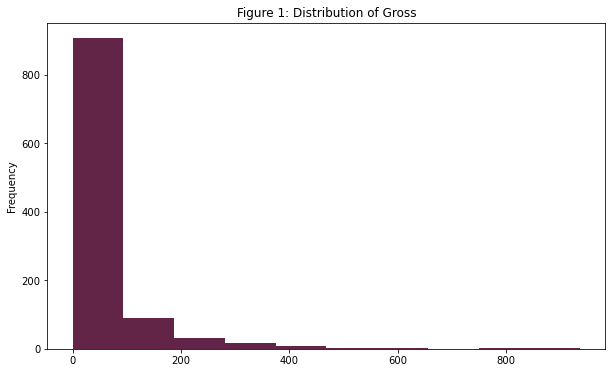

In [14]:
ax = df['gross_millions'].plot(kind='hist',figsize = (10,6), 
                               color = '#632547',
                            title = 'Figure 1: Distribution of Gross')

#### Distribution of Votes

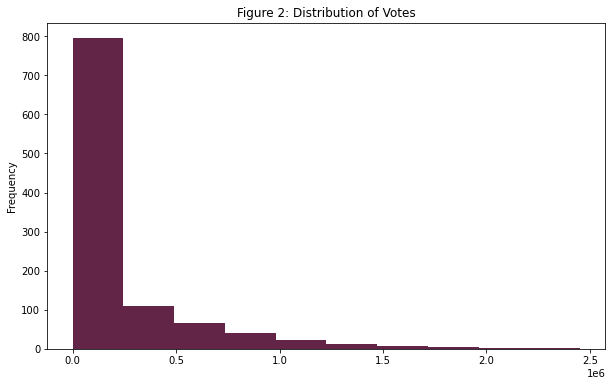

In [15]:
ax = df['votes'].plot(kind='hist',figsize = (10,6), color = '#632547',
                    title = 'Figure 2: Distribution of Votes')

#### Distribution of Ratings

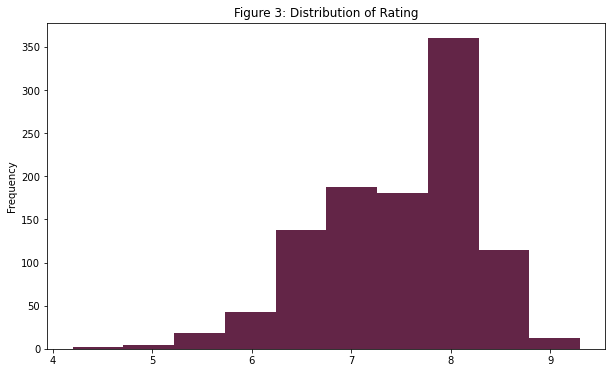

In [16]:
ax = df['rating'].plot(kind='hist',figsize = (10,6), color = '#632547',
                    title = 'Figure 3: Distribution of Rating')

#### Distribution of Run Time

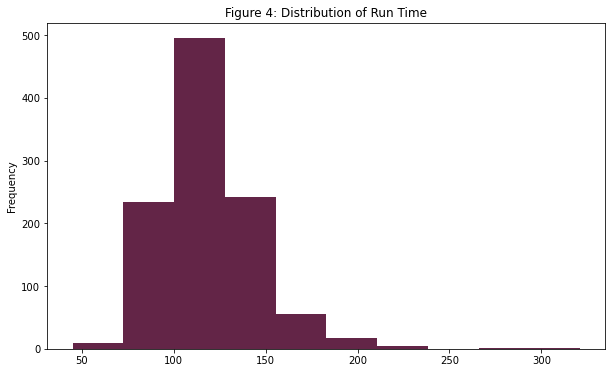

In [17]:
ax = df['run_time_mins'].plot(kind='hist',figsize = (10,6), color = '#632547',
                    title = 'Figure 4: Distribution of Run Time')

#### Distribution of Years

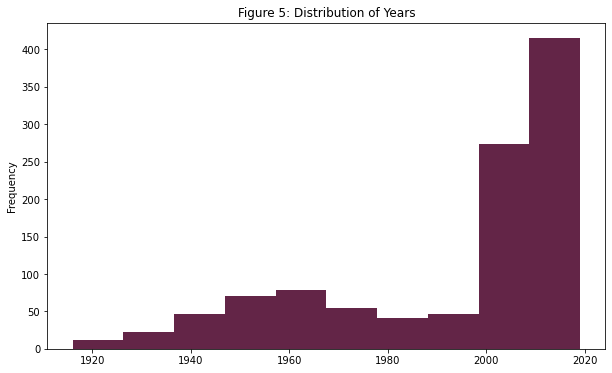

In [18]:
ax = df['year'].plot(kind='hist',figsize = (10,6), color = '#632547',
                    title = 'Figure 5: Distribution of Years')

### VI.D. Pearson Pairwise Correlational Heatmap

Figure 6 shows that *gross_millions*, or how much money a movie made when it was released, is highly correlated to:
-  *votes*
-  *rating*
-  *runtime*
-  *year*

This implies that gross income has a strong linear correlation with these features, making it an excellent predictor of revenue sources.

			 Figure 6: Distribution of Years


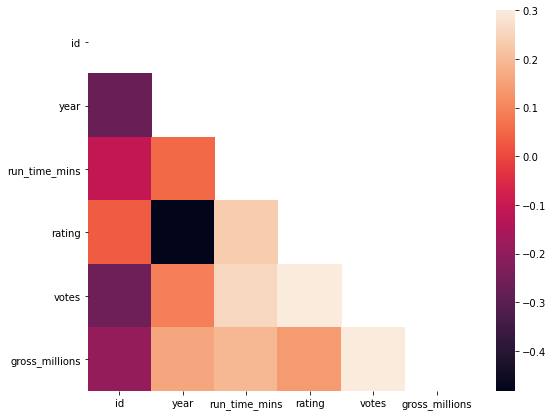

In [34]:
print(start+'\t\t\t Figure 6: '+end+ 'Distribution of Years')
utils.plot_corr(df)

### VI.E. Directors with the Highest Voted Movies

                                                          Figure 7:                                                          


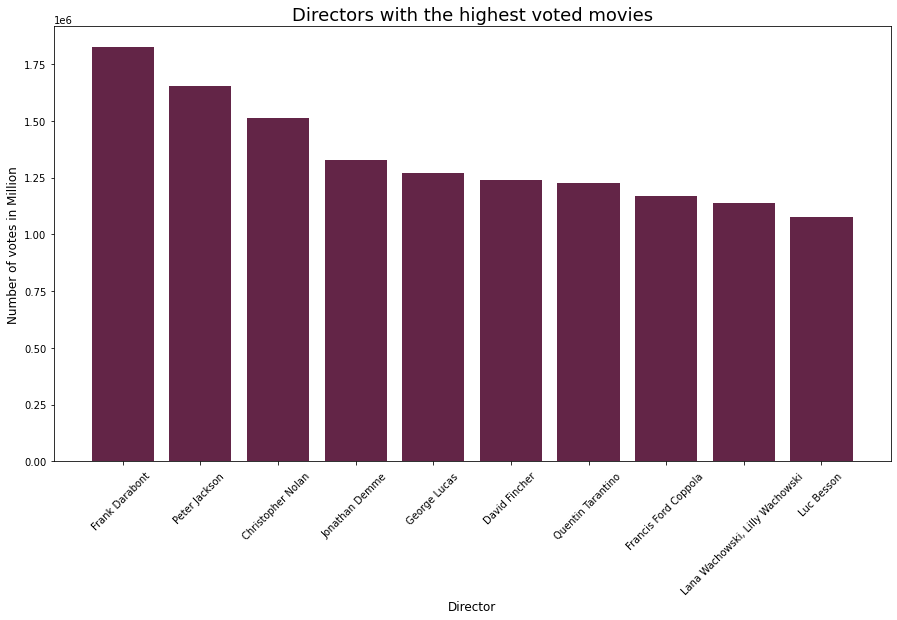

In [36]:
prnt = start + "Figure 7:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_top_dir_votes(df)

### VI.F. Director with the Lowest Voted Movies

                                                          Figure 8:                                                          


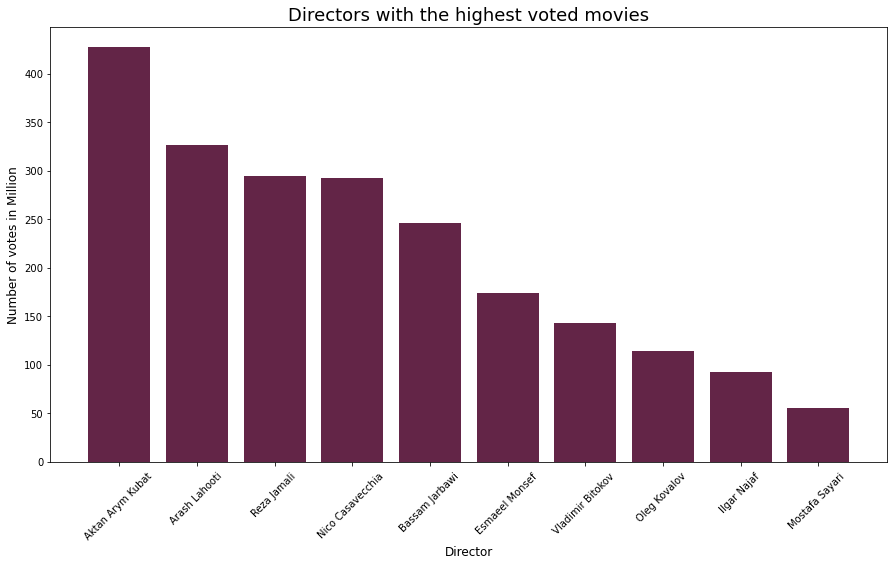

In [37]:
prnt = start + "Figure 8:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_low_dir_votes(df)

### VI.G. Highest Voted Movie

In [5]:
print (start + 'Table 4: ' + end + 'Highest Voted Movie' )
df[df['votes'] == np.max(df['votes'])]

Table 4: Highest Voted Movie


,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
0,1,The Shawshank Redemption,1994,142,Drama,9.3,"imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2451775,28.34


The highest grossing film is `The Shawshank Redemption`, directed by Frank Darabont, who was the top director in Figure 9.

### VI.H. Lowest Voted Movie

In [46]:
print (start + 'Table 5: ' + end + 'Lowest Voted Movie' )
df[df['votes'] == np.min(df['votes'])]

Table 5: Lowest Voted Movie


,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions,cleaned_overview,combined_features
373,150,As I Lay Dying,2018,80,drama,5.6,mily of four persons go to a remote village to bury their dead father there according to his will. But no one of them has heard anything about this village or visited it before.,Mostafa Sayari,"Madjid Aghakarimi, Nader Fallah, Elham Korda, Vahid Rad",55,16.27,mily four person go remote village bury dead father accord will one hear anything village visit,mily four person go remote village bury dead father accord will one hear anything village visit drama


### VI.I. Top Directors

                                                          Figure 9:                                                          


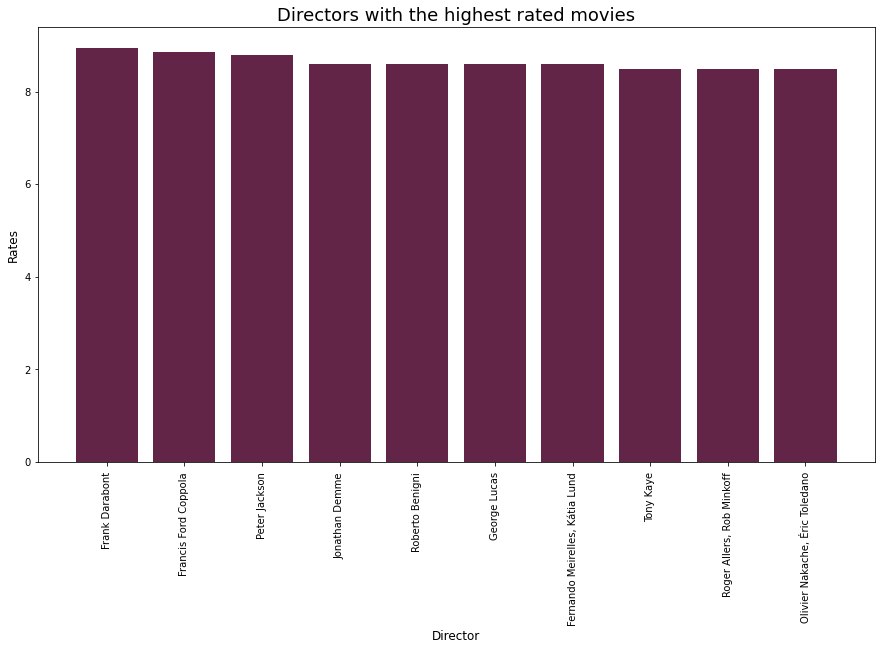

In [38]:
prnt = start + "Figure 9:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_top_dir_rate(df)

### VI.J. Number of Movies Yearly

The number of released movies began to rise in 2000, but witnessed a sharp drop when the COVID-19 pandemic hit.

                                                       Figure 10:                                                       


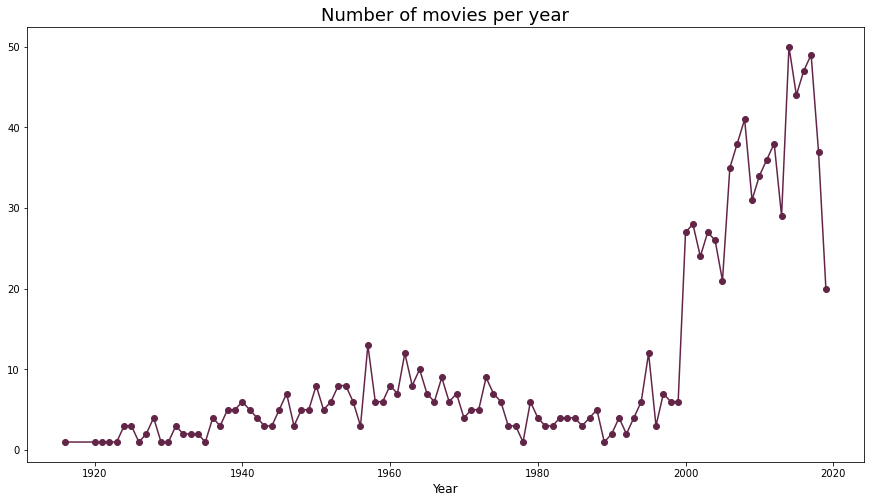

In [41]:
prnt = start + "Figure 10:" + end
str2 = prnt.center(130)
print(str2)
utils.plot_movies_per_yr(df)

### VI.K. Top Genres

Figure 11 shows that drama dominates the ranking and is also represented as a sub-genre of other ranked movie genres.

                                                          Figure 11:                                                         


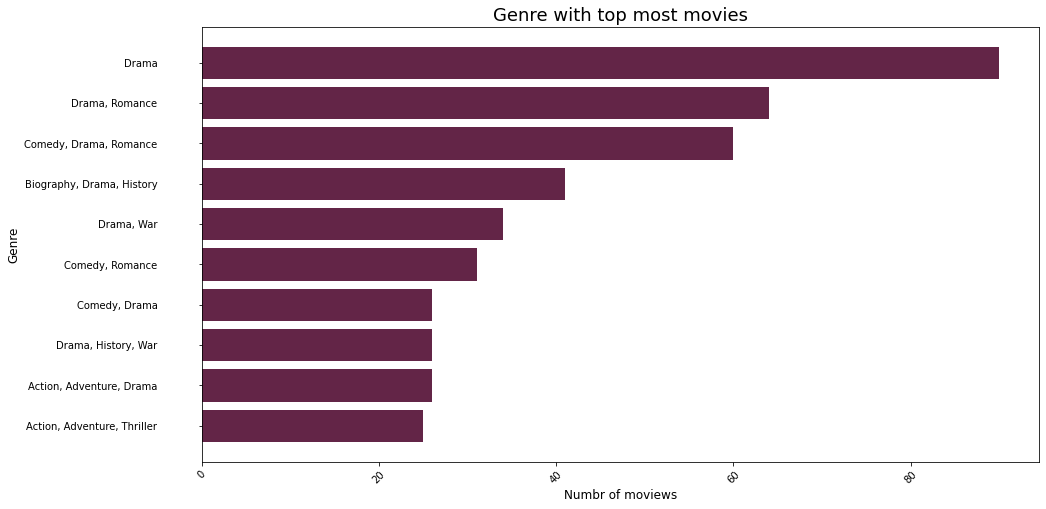

In [40]:
prnt = start + "Figure 11:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_genre(df)

### VI.L. Word Cloud of the Synopses

Figure 12 is a visualization of the `about ` column which contains two-three line movie synopses. The words with most weights are *world, war, man, woman, young, life*, and *love*. These words are commonly found in the synopses of the movies under the top genres in Figure 11. 

                                                          Figure 12:                                                         


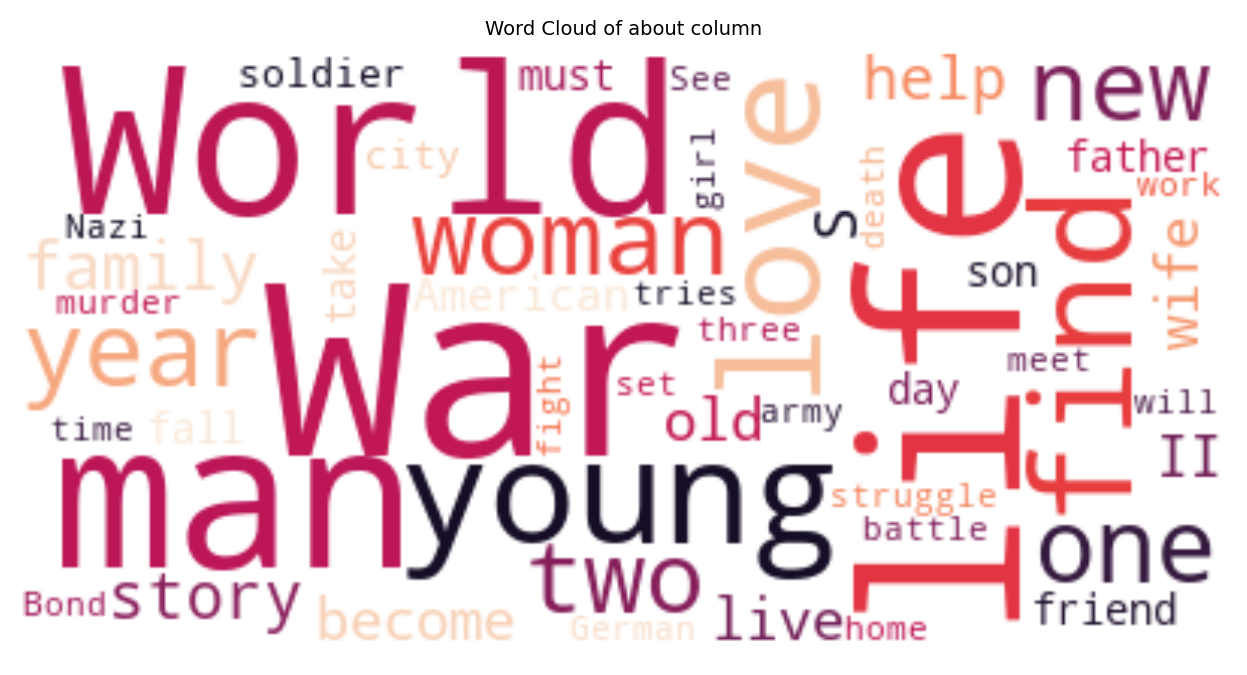

In [42]:
prnt = start + "Figure 12:" + end
str2 = prnt.center(135)
print(str2)
utils.wordcloud_feature(df)

# VII. Results & Discussion

### VII.A. Term Frequency and Inverse Document Frequency

The Term Frequency and Inverse Document Frequency (TF-IDF) featurization method was used to determine the relevance of the words to the entire sample in the form of a matrix containing the vectors representing the relevant words from the 1) cleaned overview or synopses and 2) genre. If a document is viewed as a combination of basis vectors, then it can be categorized as belonging to the topic represented by its principal vector. As a result, nonnegative matrix factorization NMF can be used to organize text collections into partitioned structures or clusters produced directly derived from the nonnegative factors.

In [43]:
df_dummy = utils.get_df_dummy(df)
df_1 = utils.add_overview_genre(df, df_dummy)
df_1 = utils.add_combined_features(utils.combined_features, df_1)
df1, tfidf = utils.tfidf_data(df)

In [47]:
print (start + 'Table 6: ' + end + 'TF-IDF of the Dataset' )
df1.head()

Table 6: TF-IDF of the Dataset


,accident,accuse,action,adventure,affair,age,agent,along,america,american,...,wife,woman,work,world,writer,wwii,year,yearold,york,young
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.516175,0.0,0.00000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.465559,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.0,0.254517,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.34066,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.391449,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0


### VII.B. Dimensionality Reduction using NMF


Unsupervised learning can be used to determine what types of natural clusters exist within the movies. Because the dataset has a high number of features, dimensionality reduction is needed to reduce it to a manageable quantity in order to avoid the curse of dimensionality.

Nonnegative Matrix Factorization (NMF) is an unsupervised data mining technique that can be used to analyze large datasets. It reduces large volumes of data, such as text data, into smaller, more sparse representations that retain the same information while employing far fewer variables. The output of NMF models may be analyzed using supervised learning and has been used for document clustering, recommendations, feature extraction, source separation, and other tasks.[[20]](https://www.researchgate.net/publication/221231082_Data_mining_using_NMF_and_generalized_matrix_inverse)


#### Selecting the Number of Topics

To select the rank, or number of components to employ, the smallest rank that minimizes error is preferred. However, in this case, this rank may be too computationally expensive. Instead, the following approach would be used to determine the rank:

1. Calculate the frobenius norm of the data frame and multiply it by .0001. This will be the benchmark value. 
2. Iterate through `rank=3, 4, 5, ..n`. For each iteration, run NMF using `n_components=rank`, and reconstruct the matrix A.
3. Calculate the Root Mean Square Error (RMSE) of the original data frame and the reconstructed `matrix A_k`. Iterations can be terminated when the RMSE is less than the benchmark value.
4. The rank and the reconstructed matrix can now be used.

For the topic modeling of the movie synopses, 103 topics or components are needed to account for the reconstruction error of less than 4%, as seen in the interpolated reconstruction error curve in Figure 13.

                                                          Figure 13:                                                         
Min rec_err: 0.0029220779440053456 at k: 103 



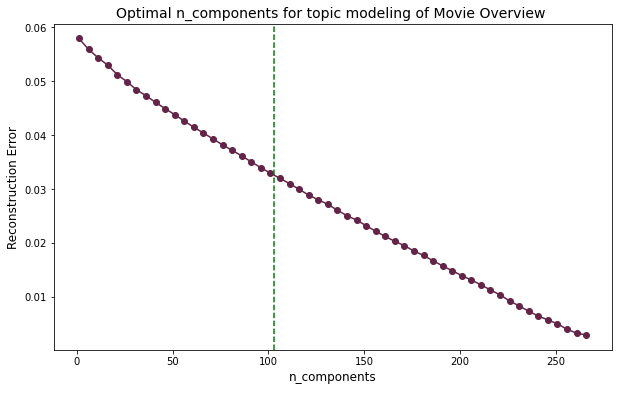

In [44]:
rmse_all, rmse_new, threshold, best_k, num_topics = utils.get_nmf_rmse(df1)
prnt = start + "Figure 13:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_interpolated_curve(rmse_all, num_topics, best_k)

In [48]:
nmf = utils.nmf(best_k, tfidf, num_topics)

## VII.C Recommender System using Cosine Similarity


Recommendation systems work  based on the similarity of the content or the users who access the content. There are various methods  to measure the similarity of two items. This similarity matrix is used by recommendation systems to suggest the next most similar product to the user.

In this project, we will create a machine learning algorithm that will recommend movies based on the synopsis and genre. The NMF is used to identify two nonnegative matrices (W, H) whose product approximates the nonnegative matrix A. The matrix will then be recreated using their dot product. The recommendation is based on this reconstructed matrix. The cosine similarity is then calculated as the measure to compute the pairwise similarity scores between two movies using sklearn.

The python cosine similarity, also known as the cosine kernel, computes similarity as the normalized dot product of input samples X and Y. To get the cos θ for the two vectors in the count matrix, we will use sklearn's `cosine_similarity`. The `cosine_sim` matrix is a numpy array that contains the calculated cosine similarity of each movie.

Cosine similarity is a metric used to determine how similar the two movies are. It computes the cosine of the angle formed by two vectors projected in a multi-dimensional space. The output value ranges from 0 to 1: 0 indicates no similarity, while 1 indicates that both movies are 100% similar. The equation was discussed in the Methodology section.

In [56]:
cosine_sim = utils.init_cosine_sim(tfidf)

## VII.D Clustering

In this project, the primary objective of clustering the movies is to identify labels that would serve as the ground truths in assessing the precision of the recommender system. The output clusters were also analyzed to provide additional insights. 

**$k$-means** is the simplest, most popular, and easiest to implement representative-based clustering method. The purpose of $k$-means is to find similar data points and group them together, while attempting to distance each cluster as far as possible. The  *similarity* is calculated using Euclidean distance or an ordinary straight line between two points. The shorter the Euclidean distance, the more similar the points are.[[21]](https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6)


### Selecting the Optimal $k$
One disadvantage of k-means clustering is that optimal $k$ is chosen manually. 

Internal validation measures such as the Calinski-Harabasz Index (CH) and Silhouette Coefficient were employed to determine the optimal number of $k$ and evaluate the quality of the clusters. The CH and Silhouette Coefficient scores converged at $k$=7 and $k$=9, respectively, and both display clear inflection points, as shown in Figure 14. The Silhouette Coefficient calculates cluster separability by averaging the distance between each point and all other points in a cluster. Because a high Silhouette Coefficient score is recommended, $k$=7 appears to be a better option.

In [49]:
cluster_dict = utils.cluster_range(df1.to_numpy(),
                             KMeans(random_state=1337),
                             2, 30, actual=None)

                                                          Figure 13:                                                         


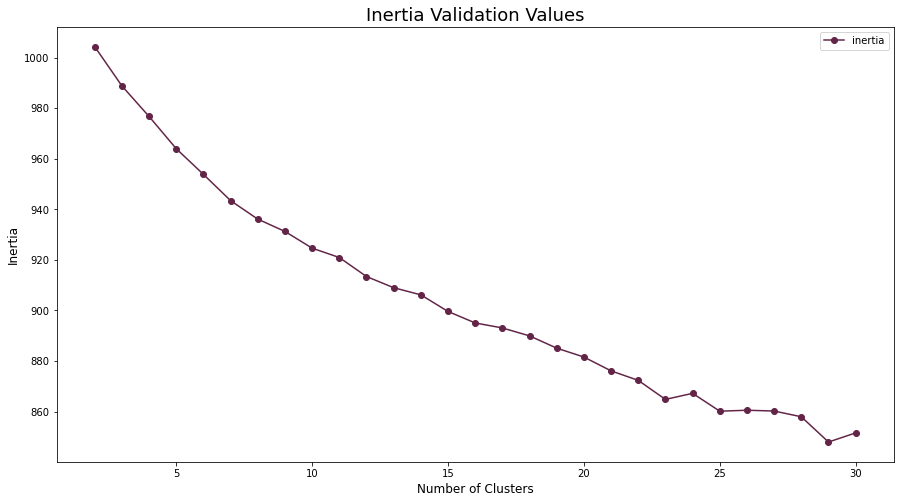

In [50]:
prnt = start + "Figure 13:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_inertia(cluster_dict)

                                                          Figure 14:                                                         


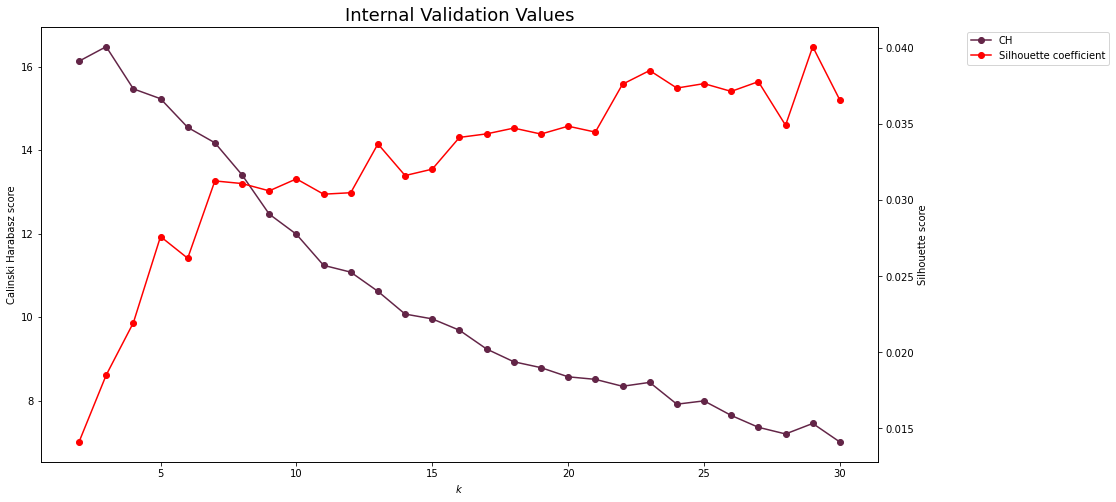

In [51]:
prnt = start + "Figure 14:" + end
str2 = prnt.center(135)
print(str2)
utils.plot_internal(cluster_dict['chs'],
               cluster_dict['scs'])

In affirming the value of $k$ identified from the internal validation measures Calinski-Harabasz Index (CH) and Silhouette Coefficient, another technique that come in handy is visualizing the seven clusters.

[1] **Compact**: The data points in the same cluster are close together; no visible points were dispersed in separate clusters.


[2] **Separability**: Despite that there are a few overlapping medium green spots, the points that do not belong in a cluster are quite distant from the ones that do. It is still safe to claim that separability is clearly seen in $k$=7.


[3] **Balance**: From eyeballing Figure 15, $k$=7 displays a comparable number of points in each cluster.


[4] **Parsimonious**: This suggests to keep the number of clusters as low as feasible in order to simplify the analysis. Going back to the internal validation scree plot, both CH and Silhouette Coefficient showed considerable movement even after $k$=7, peaking at $k$=27 for the former. It is safe to say that $k$=7 is still a lot less.

With the four characteristics assessed and considered, $k$=7 seems to be the optimal number of clusters.

                                                          Figure 15:                                                         


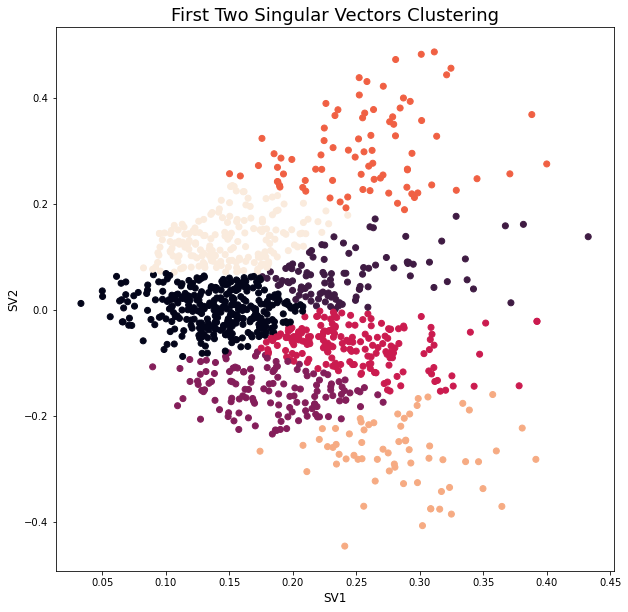

In [52]:
prnt = start + "Figure 15:" + end
str2 = prnt.center(135)
print(str2)
y_predict = utils.plot_lsa(df1)

The prominent members of each of the seven clusters will be examined to determine the genre or characteristics they may represent. Supplemental information on the identified movies in the clusters were manually obtained by searching them on the IMDb website.


### Cluster 0: Action and Drama
Based on the five most prominent members of this cluster, it can be said that cluster 0 represents the genres of action and drama with male protagonists and IMDb ratings greater than 8.

1. *Forrest Gump*: drama, romance; 8.8 rating
2. *The Matrix*: action, sci-fi; 8.7 rating
3. *Django Unchained*: drama; 8.4 rating
4. *Fight Club*: drama; 8.8 rating
5. *Gladiator:* action, drama, adventure; 8.5 rating

### Cluster 1: Comedy and Drama
The majority of cluster 1's top members are from the comedy and drama genres and were released in the 2000s.

1. *Groundhog Day*: comedy, fantasy, romance; 1993
2. *Shaun of the Dead*: comedy, horror; 2004
3. *Million Dollar Baby*: drama, sport; 2004
4. *The Notebook*: drama, romance; 2004
5. *Life of Brian*: comedy; 1979;
6. *Juno*: comedy, drama; 2007;


### Cluster 2: Crime and Drama
Cluster 2 clearly represents the critically-acclaimed crime and drama movies starring award-winning actors, with more than 8 IMDb ratings.

1. *The Wolf of Wall Street*: crime, drama; 8.2 rating
2. *The Shawshank Redemption*: drama; 9.3 rating
3. *American Beauty*: drama; 8.3 rating
4. *The Godfather Part II*: crime, drama; 9.0 rating
5. *The Green Mile*: crime, drama, fantasy; 8:6 rating


### Cluster 3: Superhero and Action
This cluster seems to have no dominant members, but common among members are having superhero characters in adventure and fantasy settings, as well as action-packed scenes.

1. *Lawrence of Arabia*: adventure, drama
2. *The Lord of the Rings -The Return of the King*: action, adventure, drama
3. *Aquaman*: action, adventure, fantasy 
4. *Wonder Woman*: action, adventure, fantasy
5. *Avengers - End Game*: action, adventure, drama


### Cluster 4: Crime and Drama
Only a few dominate this cluster of movies with varying genres. Similar characteristics are having male lead characters and a high viewer rating. It also seems like cluster 2 overlaps with cluster 2 representation. 
1. *The Godfather*: crime, drama; 9.2 rating
2. *Interstellar*: adventure, drama, sci-fi; 8.6 rating
3. *Pulp Fiction*: crime, drama; 8.9 rating
4. *The Silence of the Lambs*: crime, drama, thriller; 8.6 rating


### Cluster 5: Dark, Sci-fi, Action
Two movies are clearly the most influential in this cluster. Both belong in a similar genre combination, released in the late 2000s, and obtained super high viewer ratings.

1. *The Dark Knight*: action, adventure, drama; 2008; 9 rating
2. *Inception*:  action, adventure, sci-fi; 2010; 8.8 rating

### Cluster 6: Comedy
This last cluster definitely represents the comedy genre, and it's worth noticing that it has two release years in common and averaged ratings in the same range.

1. *Up*: comedy, adventure, animation; 2009; 8.2 rating
2. *The Hangover*: comedy; 2009: 7.7 rating
3. *The Truman Show*: comedy, drama; 1999; 8.1 rating
4. *The Big Lebowski*: comedy, crime, sport; 1999; 8.1 rating

                                                          Figure 16:                                                         


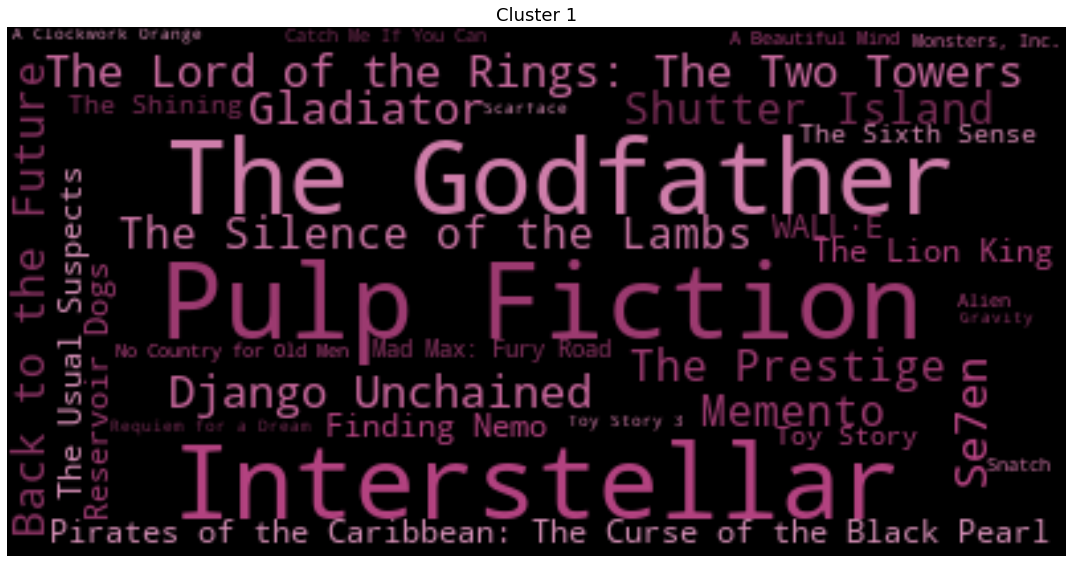

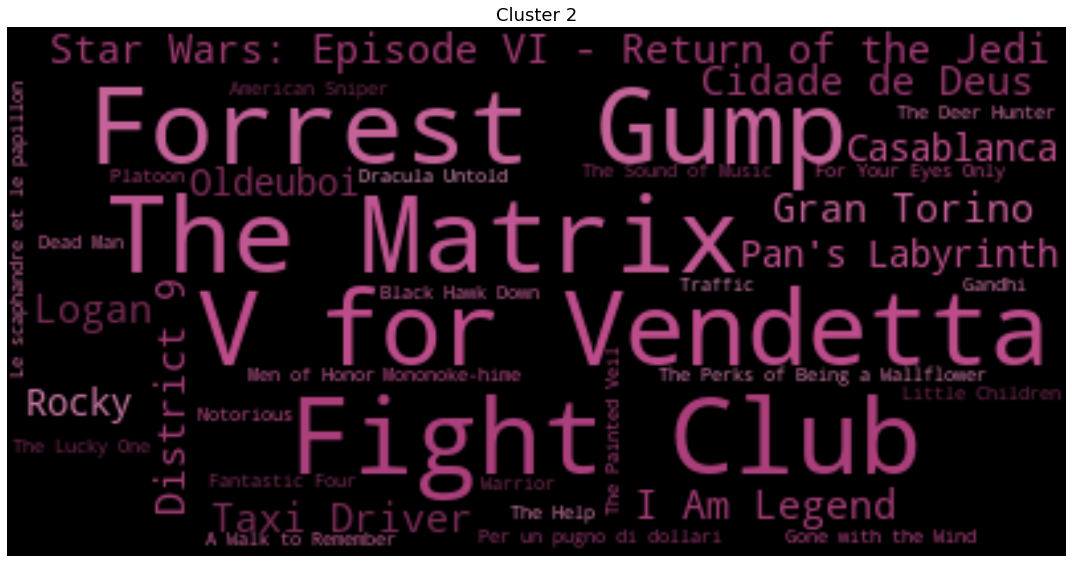

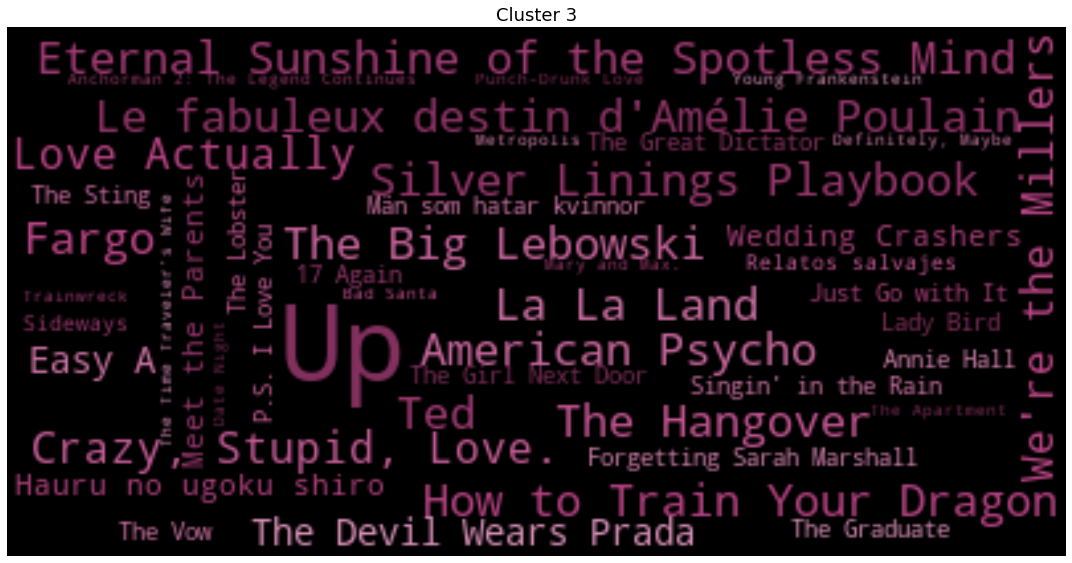

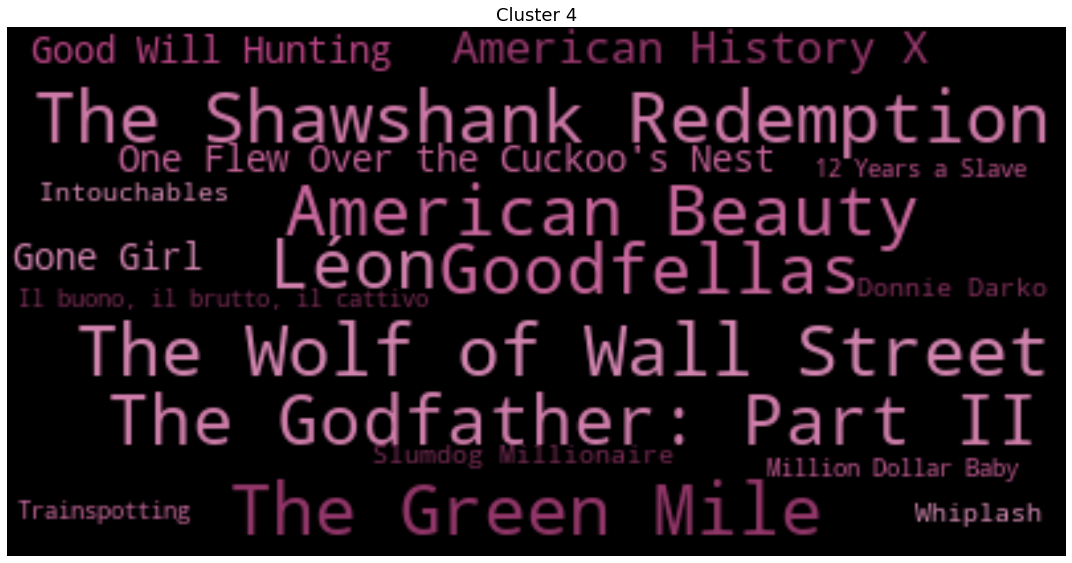

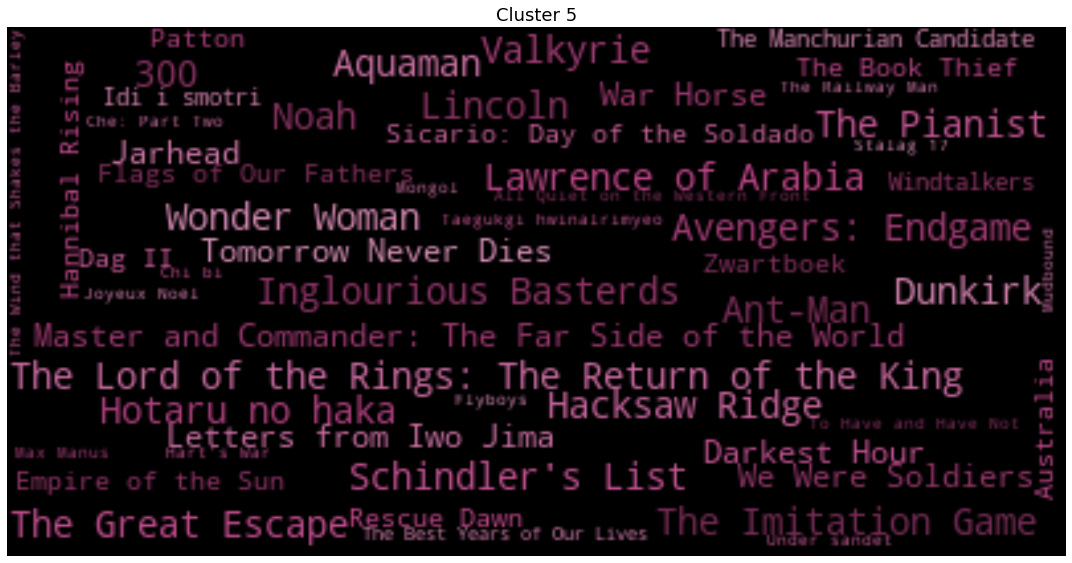

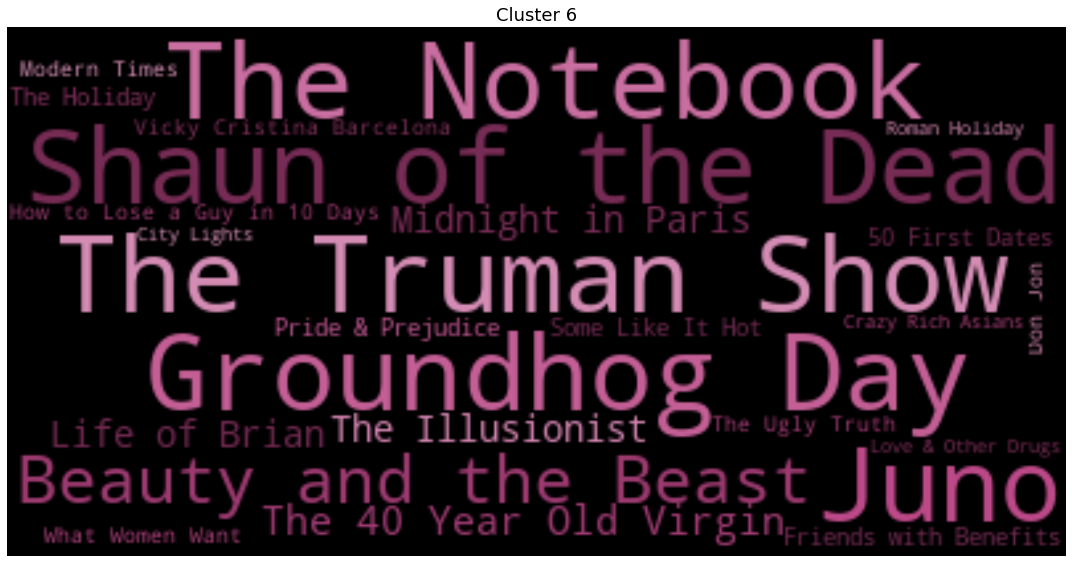

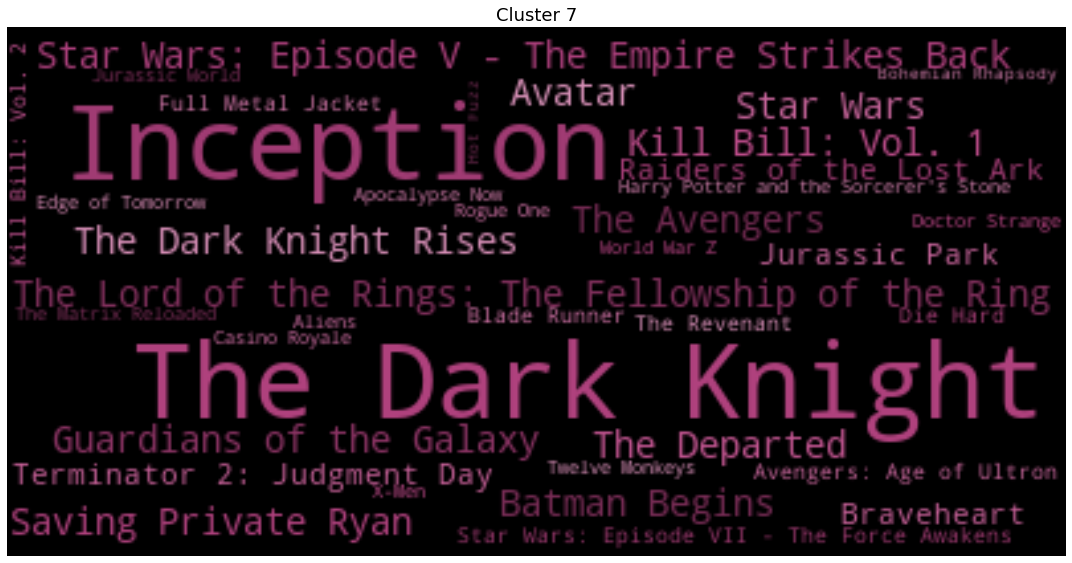

In [54]:
prnt = start + "Figure 16:" + end
str2 = prnt.center(135)
print(str2)
utils.wordcloud_cluster(df, y_predict, utils.similar_color_func)

## VII.E. Recommender System Tests

The researchers used the findings from the $k$-means clustering algorithm to generate a pseudo-ground truth label set in order to extract a precision score for calculating model performance. These labels are used in conjunction with the results of the recommender system to create a confusion matrix. The precision score was calculated using this confusion matrix.


$Precision = \frac{r}{k} = \frac{True\space Positive}{True\space Positive + False\space Positive}$
  
  
For this study, a higher precision score is desired since the researchers are more interested in the percentage of relevant results returned by the recommender system.


The below tables show a few samples of the results generated from the recommender system and the random prediction. The Researchers ran a number of searches but will only reveal three for display purposes.

#### Query 1: Finding Nemo

In [57]:
print (start + 'Table 7: ' + end + 'Top Recommended Movies for Finding Nemo' )
movie_user_likes = "Finding Nemo"
utils.get_top_recommended_movies(df, movie_user_likes,
                                              5, cosine_sim)

Table 7: Top Recommended Movies for Finding Nemo


,Movie Name,About
0,Te doy mis ojos,"winter night, Pilar runs away from home. With her, she takes only a few belongings and her son, Juan. Antonio soon sets out to look for her. He says Pilar is his sunshine, and what's more, ""She gave him her eyes""..."
1,Toy Story 3,"toys are mistakenly delivered to a day-care center instead of the attic right before Andy leaves for college, and it's up to Woody to convince the other toys that they weren't abandoned and to return home."
2,Fish Tank,ything changes for 15-year-old Mia when her mum brings home a new boyfriend.
3,Venuto al mondo,"ther brings her teenage son to Sarajevo, where his father died in the Bosnian conflict years ago."
4,Hachi: A Dog's Tale,llege professor bonds with an abandoned dog he takes into his home.


In [59]:
print (start + 'Table 8: ' + end + 'Top Random Recommended Movies for Finding'
       ' Nemo')
utils.get_random_model_movies(df, movie_user_likes, 5)

Table 8: Top Random Recommended Movies for Finding Nemo


,Movie Name,About
0,The Lost Weekend,desperate life of a chronic alcoholic is followed through a four-day drinking bout.
1,Flags of Our Fathers,"life stories of the six men who raised the flag at the Battle of Iwo Jima, a turning point in World War II."
2,The Sleeping Dictionary,ung Englishman is sent to Malaysian Borneo in the 1930s to stay with a tribe as UK's colonial representative. A local woman (J.Alba) helps him understand local tradition and language. He falls in love with her etc. despite the taboo.
3,Edge of Tomorrow,"ldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies."
4,Strangers on a Train,ychopath forces a tennis star to comply with his theory that two strangers can get away with murder.


#### Query 2: 3 Idiots

In [61]:
print (start + 'Table 9: ' + end + 'Top Recommended Movies for 3 '
       'Idiots')
movie_user_likes = "3 Idiots"
utils.get_top_recommended_movies(df, movie_user_likes, 5, cosine_sim)

Table 9: Top Recommended Movies for 3 Idiots


,Movie Name,About
0,Harvey,"to his insistence that he has an invisible six foot-tall rabbit for a best friend, a whimsical middle-aged man is thought by his family to be insane - but he may be wiser than anyone knows."
1,Vicky Cristina Barcelona,"friends on a summer holiday in Spain become enamored with the same painter, unaware that his ex-wife, with whom he has a tempestuous relationship, is about to re-enter the picture."
2,Hors de prix,"ugh a set of wacky circumstances, a young gold digger mistakenly woos a mild-mannered bartender, thinking he's a wealthy suitor."
3,Der Rote Baron,"an biopic loosely based on the World War I fighter ace Manfred Von Richthofen, nicknamed the Red Baron by friend and foe alike."
4,Trainspotting,"on, deeply immersed in the Edinburgh drug scene, tries to clean up and get out, despite the allure of the drugs and influence of friends."


In [62]:
print (start + 'Table 10: ' + end + 'Top Random Recommended Movies for 3'
       ' Idiots')
utils.get_random_model_movies(df, movie_user_likes, 5)

Table 10: Top Random Recommended Movies for 3 Idiots


,Movie Name,About
0,The Lost Weekend,desperate life of a chronic alcoholic is followed through a four-day drinking bout.
1,Flags of Our Fathers,"life stories of the six men who raised the flag at the Battle of Iwo Jima, a turning point in World War II."
2,The Sleeping Dictionary,ung Englishman is sent to Malaysian Borneo in the 1930s to stay with a tribe as UK's colonial representative. A local woman (J.Alba) helps him understand local tradition and language. He falls in love with her etc. despite the taboo.
3,Edge of Tomorrow,"ldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies."
4,Strangers on a Train,ychopath forces a tennis star to comply with his theory that two strangers can get away with murder.


#### Query 3: The Dark Knight

In [63]:
print (start + 'Table 11: ' + end + 'Top Recommended Movies for The Dark'
       ' Knight')
movie_user_likes = "The Dark Knight"
utils.get_top_recommended_movies(df, movie_user_likes, 5, cosine_sim)

Table 11: Top Recommended Movies for The Dark Knight


,Movie Name,About
0,La battaglia di Algeri,"he 1950s, fear and violence escalate as the people of Algiers fight for independence from the French government."
1,The Zookeeper's Wife,"ers of the Warsaw Zoo, Antonina and Jan Zabinski, must save hundreds of people and animals during the Nazi invasion in WWII Poland."
2,The Navigator,spoiled rich people find themselves trapped on an empty passenger ship.
3,Michael Clayton,"w firm brings in its ""fixer"" to remedy the situation after a lawyer has a breakdown while representing a chemical company that he knows is guilty in a multibillion-dollar class action suit."
4,1898. Los últimos de Filipinas,ldiers trapped inside a church as last refugee. A fight that no one couldn't win. A war that no one wanted to lose.


In [64]:
print (start + 'Table 10: ' + end + 'Top Random Recommended Movies for The'
       ' Dark Knight')
movie_user_likes = "The Dark Knight"
utils.get_random_model_movies(df, movie_user_likes, 5)

Table 10: Top Random Recommended Movies for The Dark Knight


,Movie Name,About
0,The Lost Weekend,desperate life of a chronic alcoholic is followed through a four-day drinking bout.
1,Flags of Our Fathers,"life stories of the six men who raised the flag at the Battle of Iwo Jima, a turning point in World War II."
2,The Sleeping Dictionary,ung Englishman is sent to Malaysian Borneo in the 1930s to stay with a tribe as UK's colonial representative. A local woman (J.Alba) helps him understand local tradition and language. He falls in love with her etc. despite the taboo.
3,Edge of Tomorrow,"ldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies."
4,Strangers on a Train,ychopath forces a tennis star to comply with his theory that two strangers can get away with murder.


# VIII. Conclusion

**Simple Movie Recommender System vs. Random Prediction**

When the performance of the simple movie recommender system is compared to the random prediction model, the following conclusions can be drawn:

[1] The most effective feature combination was movie synopses paired with genres, which provided the highest precision score. Other feature combinations were also scored and tested.


[2] The pseudo-ground truth label set (the seven output clusters generated by the $k$-means clustering algorithm), combined with the results of the recommender system, was successful in measuring the model's performance.


[3] Last but not least, the recommender system outperforms random prediction by a factor of two. The former produced an average precision score of ***37.96%***, but the latter produced only ***18.03%***.

In [80]:
model_mean_precision, random_mean_precision = utils.compute_model_performance(
                                            df_orig, 5, cosine_sim)
random_precision_mean_k5 = np.mean(random_mean_precision)
model_precision_mean_k5 = np.mean(model_mean_precision)
prec_k5_df = pd.DataFrame(list([str(random_precision_mean_k5*100)+'%', 
                                 str(model_precision_mean_k5*100)+'%'])).T
prec_k5_df.columns = ['random_mean_precision','model_mean_precision']
print (start + 'Table 12: ' + end + 'Model vs Random Precision for k = 5')
prec_k5_df

Table 12: Model vs Random Precision for k = 5


,random_mean_precision,model_mean_precision
0,18.037735849056602%,37.96226415094339%


# IX. Recommendations

The following are the researchers' recommendations:

[1] Due to time and computing constraints, the researchers were unable to acquire a larger dataset for this project.The built movie recommender system utilized limited sample size of about 1,400 data points. The robustness of the model can be improved by adding more movie synopses and genres.


[2] Collaborative filtering and content-based filtering are the two main types of movie recommender systems. The most successful and traditional recommender system is considered to be collaborative filtering, which creates recommendations based on similar user preferences, whereas content-based or cognitive filtering recommends a movie based on a comparison between the movie's content and a user profile.[[22]](https://www.ripublication.com/acst17/acstv10n7_01.pdf) Both systems utilize user demographic data, which was not explored in this project due to the unavailability of open data. Further enhancement of the model may be achieved by employing user demographic information.


[3] The created recommender system was mainly focused on movies, whereas in-market streaming providers offer both movies and TV series. Extending the project's scope to include TV series data will be beneficial to the identified proponents – local media businesses and aspiring streaming service providers, as well as the users. Episodic programs are also said to be  the primary driver of binge-watching.[[23]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7344932/)


[4] Finally, while this project does not promote binge-watching, it does recognize its value during this challenging period brought about by COVID-19. The researchers recommend that more research and consideration be given to the negative attributes of binge-watching in order to untangle the multiple issues surrounding binge-watching and highlight the distinction between compulsive and recreational binge-watching.

# X. References

[1] Kaggle. (2017). *Movie Recommender Systems*. https://www.kaggle.com/rounakbanik/movie-recommender-systems.

[2] National Center for Biotechnology Information. (22 June 2020). *Understanding the Phenomenon of Binge-Watching - A Systematic Review*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7344932/.

[3] Ibid.

[4] National Center for Biotechnology Information. (13 May 2020). *Binge watching behavior during COVID 19 pandemic: A cross-sectional, cross-national online survey*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7219409/#bib0002. 

[5] South Asian Journal of Marketing. (16 August 2021). *Impacts of Binge-Watching on Netflix during the COVID-19 pandemic*. https://www.emerald.com/insight/content/doi/10.1108/SAJM-05-2021-0070/full/html.

[6] IGN Southeast Asia. (30 August 2021). *What Is the Future of the Streaming Wars? - State of Streaming 3.0*. https://sea.ign.com/feature/176013/what-is-the-future-of-the-streaming-wars-state-of-streaming-30.

[7] USNews. (08 September 2021). *Best Streaming Services of 2021*. https://www.usnews.com/360-reviews/streaming-services.

[8] Business of Apps. (07 May 2021). *Video Streaming App Revenue and Usage Statistics (2021)*. https://www.businessofapps.com/data/video-streaming-app-market/.

[9] USNews. (08 September 2021). *Best Streaming Services of 2021*. https://www.usnews.com/360-reviews/streaming-services.

[10] The New York Times. (15 December 2020). *Philippine Congress Officially Shuts Down Leading Broadcaster*. https://www.nytimes.com/2020/07/10/world/asia/philippines-congress-media-duterte-abs-cbn.html.

[11] Wikipedia. (21 August 2021). *IWantTFC. https://en.wikipedia.org/wiki/IWantTFC#Content.

[12] The Manila Times. (24 November 2020). *ABS-CBN launches new iWantTFC streaming service*. https://www.manilatimes.net/2020/11/24/lifestyle-entertainment/show-times/abs-cbn-launches-new-iwanttfc-streaming-service/800629.

[13] Esquire. (14 January 2021). *Is Netflix Raising Its Prices in the Philippines Soon?*. https://www.esquiremag.ph/money/industry/netflix-price-increase-philippines-a00289-20210114.

[14] Science Direct. (November 2015). *Recommendation systems: Principles, methods and evaluation*. https://www.sciencedirect.com/science/article/pii/S1110866515000341.

[15] Wikipedia. (21 September 2021). *IMDb*. https://en.wikipedia.org/wiki/IMDb. 

[16] Science Direct. (2017). *Latent Semantic Analysis* https://www.sciencedirect.com/topics/computer-science/latent-semantic-analysis.

[17] Integrated Knowledge Solutions. (21 March 2016). *What is NMF and what can you do with it?*. https://iksinc.online/2016/03/21/what-is-nmf-and-what-can-you-do-with-it/.

[18] HAL-Inria. (Accessed 15 September 2021). *The process of turning mined topic models*. https://hal.inria.fr/file/index/docid/681906/filename/faq-assembly.tex.

[19] Stanford. (Accessed 15 September 2021). *K Means*. https://stanford.edu/~cpiech/cs221/handouts/kmeans.html.

[20] ResearchGate. (November 2010). *Data mining using NMF and generalized matrix inverse*. https://www.researchgate.net/publication/221231082_Data_mining_using_NMF_and_generalized_matrix_inverse.

[21] Towards Data Science. (14 July 2020). *Explaining K-Means Clustering*. https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6.

[22] Research India Publications. (2017). *DECORS: A Simple and Efficient Demographic Collaborative Recommender System for Movie Recommendation*. https://www.ripublication.com/acst17/acstv10n7_01.pdf.

[23] National Center for Biotechnology Information. (22 June 2020). *Understanding the Phenomenon of Binge-Watching - A Systematic Review*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7344932/.